In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [3]:
sales = pd.read_csv('../data/basic/train.csv', parse_dates=['date'])
keys = pd.read_csv('../data/basic/key.csv')
weather = pd.read_csv('../data/basic/weather.csv',parse_dates=['date'])
df_1 = pd.merge(weather,keys)
df_1 = pd.merge(df_1, sales)

final_sample = pd.read_csv('../data/01. final_sample')
trimmed = final_sample.iloc[:, 1:]

dates = df_1['date'].dt
df_1['year'] = dates.year
df_1['month'] = dates.month
df_1['day'] = dates.day

In [4]:
def show_codesum(store_nbr, year, month):
    final_sample = pd.read_csv('../data/01. final_sample')
    trimmed = final_sample.iloc[:, 1:]
    trimmed = trimmed[trimmed['store_nbr']==store_nbr]
    
    return trimmed[(trimmed['year'] == year) & (trimmed['store_nbr'] == store_nbr) & (trimmed['month'] == month)]

In [5]:
def find_store(station_nbr):
    '''
    input : station_nbr
    output : store_nbrs dependent to station_nbr
    '''
    
    station = df_1[df_1['station_nbr']==station_nbr]
    return station['store_nbr'].unique()

In [6]:
def item_nbr_tendency(store_nbr):
    store = df_1[df_1['store_nbr'] == store_nbr]

    pivot = store.pivot_table(index=['year','month'],columns='item_nbr',values='units',aggfunc=np.sum)
    zero_index = pivot==0
    pivot = pivot[pivot!=0].dropna(axis=1,how='all')
    pivot[zero_index]=0
    
    
    pivot_2012 = pivot.loc[2012]
    pivot_2013 = pivot.loc[2013]
    pivot_2014 = pivot.loc[2014]
    
    plt.figure(figsize=(12,8))
    plt.subplot(131)
    sns.heatmap(pivot_2012,cmap="YlGnBu", annot = True, fmt = '.0f')
    plt.subplot(132)
    sns.heatmap(pivot_2013,cmap="YlGnBu", annot = True, fmt = '.0f')
    plt.subplot(133)
    sns.heatmap(pivot_2014,cmap="YlGnBu", annot = True, fmt = '.0f')
    plt.show()

In [7]:
def item_nbr_tendency_finely(store_nbr, year, month):
    store = df_1[(df_1['store_nbr'] == store_nbr) &
                 (df_1['year'] == year) &
                 (df_1['month'] == month)]

    pivot = store.pivot_table(index='item_nbr',
                              columns='day',
                              values='units',
                              aggfunc=np.sum)
    zero_index = pivot == 0
    pivot = pivot[pivot != 0].dropna(axis=0, how='all')
    pivot[zero_index] = 0

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt='.0f')
    plt.show()
    
    return pivot

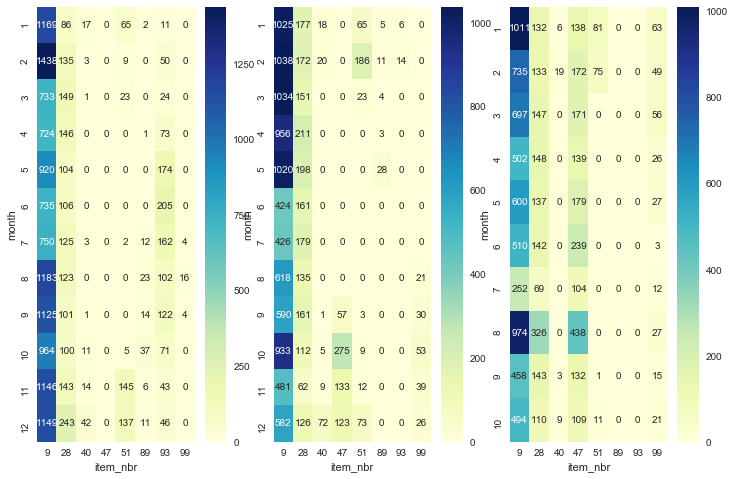

In [9]:
item_nbr_tendency(1)

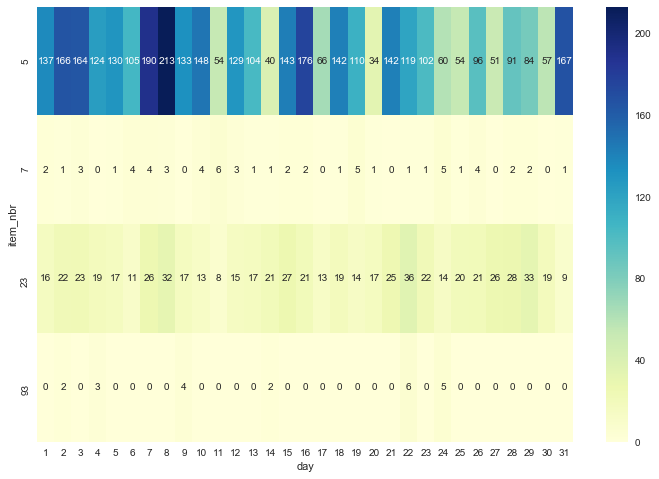

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
item_nbr,,,,,,,,,,,,,,,,,,,,,
5,137.0,166.0,164.0,124.0,130.0,105.0,190.0,213.0,133.0,148.0,...,119.0,102.0,60.0,54.0,96.0,51.0,91.0,84.0,57.0,167.0
7,2.0,1.0,3.0,0.0,1.0,4.0,4.0,3.0,0.0,4.0,...,1.0,1.0,5.0,1.0,4.0,0.0,2.0,2.0,0.0,1.0
23,16.0,22.0,23.0,19.0,17.0,11.0,26.0,32.0,17.0,13.0,...,36.0,22.0,14.0,20.0,21.0,26.0,28.0,33.0,19.0,9.0
93,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,...,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
item_nbr_tendency_finely(7,2012,1)